#### Team ARPA - Cordero Hernández, Marco Ricardo; Rodríguez Castro, Carlos Eduardo

# Dataset Cleaning

Through this notebook, the dataset selected for the project will be cleaned and adjusted according to code guidelines for subsequent prediction(s).

## Step 1. Loading libraries and dataset

In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read dataset
ds_bst = pd.read_csv('bird_strikes.csv')
ds_bst

,record_id,aircraft_type,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,effect_impact_to_flight,flightdate,effect_indicated_damage,...,remains_of_wildlife_sent_to_smithsonian,remarks,wildlife_size,conditions_sky,wildlife_species,pilot_warned_of_birds_or_wildlife,cost_total,feet_above_ground,number_of_people_injured,is_aircraft_large
0,203333,Airplane,PEASE INTL TRADEPORT,< 1000 ft,C-172,2 to 10,3,Precautionary Landing,2000-05-30T00:00:00,Caused damage,...,False,BLACKBIRDS OR CROWS. 2 SLIGHT DENTS I BOTTOM S...,Medium,Some Cloud,American crow,True,0,1000,0,False
1,202994,Airplane,FORT SMITH MUNICIPAL ARPT,< 1000 ft,C-172,2 to 10,10,None,2000-06-25T00:00:00,No damage,...,False,2 birds,Small,No Cloud,Unknown bird - small,False,0,20,0,False
2,205350,Airplane,OXNARD ARPT,< 1000 ft,C-172,2 to 10,4,None,2000-07-17T00:00:00,No damage,...,False,BIRD PICKED UP FROM RWY IMMED AFTER STRIKE. A/...,Small,No Cloud,Unknown bird - small,False,0,100,0,False
3,204264,Airplane,DUPAGE AIRPORT,< 1000 ft,C-172,2 to 10,5,None,2000-08-12T00:00:00,Caused damage,...,False,HIT WING STRUT,Small,No Cloud,Unknown bird - small,False,0,150,0,False
4,204225,Airplane,DUPAGE AIRPORT,< 1000 ft,PA-28,2 to 10,6,None,2000-08-12T00:00:00,Caused damage,...,False,"NO VIZ DMG, UNKNOWN WHAT PARTS WERE STRUCK",Small,Some Cloud,Unknown bird - small,False,0,100,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25553,318514,Airplane,FORT LAUDERDALE EXECUTIVE ARPT,< 1000 ft,PA-31-350,1,1,None,2011-10-18T00:00:00,No damage,...,True,ID BY SMITHSONIAN. CARCASS RETRIEVED BY ARPT S...,Small,Overcast,American kestrel,False,0,20,0,False
25554,317598,Airplane,HONOLULU INTL ARPT,< 1000 ft,F/A-18,1,1,None,2011-10-22T00:00:00,No damage,...,False,BIRD HIT NOSE. RWY RETPD AT 08R AND 08L.,Small,No Cloud,Unknown bird - small,False,0,0,0,False
25555,317732,Helicopter,HAMPTON ROADS EXECUTIVE,< 1000 ft,EC-135,1,1,Precautionary Landing,2011-10-24T00:00:00,Caused damage,...,False,RETURNED TO PITT COUNTY MEMORIAL HOSPITAL.,Small,No Cloud,Unknown bird - small,False,0,800,0,False
25556,319486,Airplane,KALAELOA ARPT JOHN RODGERS FIELD,< 1000 ft,DA-40,1,1,None,2011-11-30T00:00:00,No damage,...,False,NO DMG TO A/C. CKD BY MX.,Small,No Cloud,Zebra dove,False,0,0,0,False


In [3]:
# Dataset info
ds_bst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   record_id                                25558 non-null  int64  
 1   aircraft_type                            25558 non-null  object 
 2   airport_name                             25558 non-null  object 
 3   altitude_bin                             25558 non-null  object 
 4   aircraft_make_model                      25558 non-null  object 
 5   wildlife_number_struck                   25558 non-null  object 
 6   wildlife_number_struck_actual            25558 non-null  int64  
 7   effect_impact_to_flight                  25558 non-null  object 
 8   flightdate                               25558 non-null  object 
 9   effect_indicated_damage                  25558 non-null  object 
 10  aircraft_number_of_engines               25290

In [4]:
# Dataset stats
ds_bst.describe()

,record_id,wildlife_number_struck_actual,aircraft_number_of_engines,cost_total,feet_above_ground,number_of_people_injured
count,25558.000000,25558.000000,25290.000000,2.555800e+04,25558.000000,25558.000000
mean,253916.085609,2.691525,2.001068,5.567354e+03,797.916778,0.001056
std,38510.453382,12.793975,0.368227,1.219713e+05,1736.341046,0.050420
min,1195.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,225783.750000,1.000000,2.000000,0.000000e+00,0.000000,0.000000
50%,248749.000000,1.000000,2.000000,0.000000e+00,50.000000,0.000000
75%,269168.750000,1.000000,2.000000,0.000000e+00,700.000000,0.000000
max,321909.000000,942.000000,4.000000,1.239775e+07,18000.000000,6.000000


Through this analysis, it can be determined that multiple columns are useless towards the desired final result.  
Also, some data has to be processed in order to be treated as numerical value, this beign a transformation from strings to booleas or other numerical data type.

## 2. Modification and dataset visualization

In [5]:
# Null values identification
ds_bst.isna().sum(axis = 0)

record_id                                     0
aircraft_type                                 0
airport_name                                  0
altitude_bin                                  0
aircraft_make_model                           0
wildlife_number_struck                        0
wildlife_number_struck_actual                 0
effect_impact_to_flight                       0
flightdate                                    0
effect_indicated_damage                       0
aircraft_number_of_engines                  268
aircraft_airline_operator                     0
origin_state                                449
when_phase_of_flight                          0
conditions_precipitation                      0
remains_of_wildlife_collected                 0
remains_of_wildlife_sent_to_smithsonian       0
remarks                                    4771
wildlife_size                                 0
conditions_sky                                0
wildlife_species                        

Three columns have been identified to have null values, from which only one column will be modified to acommodate non-null values (the other ones will be deleted later on).

In [6]:
# Null values replacement
ds_bst['aircraft_number_of_engines'].fillna(value = int(ds_bst['aircraft_number_of_engines'].mean()), inplace = True)

print(f"Null qty remaining: {ds_bst.isna().sum(axis = 0)['aircraft_number_of_engines']}")

Null qty remaining: 0


After doing this, non-relevant columns will be dropped for better data manipulation.

In [7]:
# Non-relevant columns dropping
nrc = [
    'record_id',
    'airport_name',
    'wildlife_number_struck',
    'flightdate',
    'aircraft_airline_operator',
    'origin_state',
    'remains_of_wildlife_sent_to_smithsonian',
    'remarks',
    'wildlife_species',
    'cost_total'
]
''' 
    Although 'cost_total' could be used, the information related to that feature
    it's only obtained after the accident has occurred 
'''

ds_bst.drop(nrc, inplace = True, axis = 1)
ds_bst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   aircraft_type                      25558 non-null  object 
 1   altitude_bin                       25558 non-null  object 
 2   aircraft_make_model                25558 non-null  object 
 3   wildlife_number_struck_actual      25558 non-null  int64  
 4   effect_impact_to_flight            25558 non-null  object 
 5   effect_indicated_damage            25558 non-null  object 
 6   aircraft_number_of_engines         25558 non-null  float64
 7   when_phase_of_flight               25558 non-null  object 
 8   conditions_precipitation           25558 non-null  object 
 9   remains_of_wildlife_collected      25558 non-null  bool   
 10  wildlife_size                      25558 non-null  object 
 11  conditions_sky                     25558 non-null  obj

Once the dataset contains only the relevant features, those with strings/objects need to be transformed to some sort of integer interpretation.  
The methods proposed to turn repeated string values and booleans are the following.

In [8]:
def categorize(dataset, feature):
    holder = {}
    index = 0

    for row in dataset[feature]:
        if (row not in holder):
            holder[row] = index
            index += 1
    
    for val in holder:
        dataset[feature] = dataset[feature].replace([f'{val}'], holder[val])

def to_binary(dataset, feature, inverse = False):
    if not inverse:
        dataset[feature] = dataset[feature].apply(lambda x : 1 if x else 0)
    else:
        dataset[feature] = dataset[feature].apply(lambda x : 0 if x else 1)

In [9]:
features = ds_bst.columns.values
to_modify = (0, 1, 2, 4, 5, 7, 8, 10, 11)
to_bin = (9, 12, 15)

# Implementation not recommended for long features lenght (<50)
for i in range(16):
    if (i in to_modify):
        categorize(ds_bst, features[i])
    elif (i in to_bin):
        to_binary(ds_bst, features[i])

ds_bst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   aircraft_type                      25558 non-null  int64  
 1   altitude_bin                       25558 non-null  int64  
 2   aircraft_make_model                25558 non-null  int64  
 3   wildlife_number_struck_actual      25558 non-null  int64  
 4   effect_impact_to_flight            25558 non-null  int64  
 5   effect_indicated_damage            25558 non-null  int64  
 6   aircraft_number_of_engines         25558 non-null  float64
 7   when_phase_of_flight               25558 non-null  int64  
 8   conditions_precipitation           25558 non-null  int64  
 9   remains_of_wildlife_collected      25558 non-null  int64  
 10  wildlife_size                      25558 non-null  int64  
 11  conditions_sky                     25558 non-null  int

Although the binary converter works fine, there's a problem regarding data apparition in *effect_indicated_damage*.
Because of the dataset order, the desired output representation it's inverted, meaning that a 0 corresponds to a positive results and a 1 to a negative result.
The next code fragment addresses this issue.

In [10]:
to_binary(ds_bst, features[5], inverse = True)

In [11]:
ds_bst.describe()

,aircraft_type,altitude_bin,aircraft_make_model,wildlife_number_struck_actual,effect_impact_to_flight,effect_indicated_damage,aircraft_number_of_engines,when_phase_of_flight,conditions_precipitation,remains_of_wildlife_collected,wildlife_size,conditions_sky,pilot_warned_of_birds_or_wildlife,feet_above_ground,number_of_people_injured,is_aircraft_large
count,25558.000000,25558.000000,25558.000000,25558.000000,25558.000000,25558.000000,25558.000000,25558.000000,25558.000000,25558.000000,25558.000000,25558.000000,25558.000000,25558.000000,25558.000000,25558.000000
mean,0.005047,0.191408,119.859809,2.691525,1.014477,0.390680,2.001056,1.709210,0.116832,0.267079,0.848228,0.824086,0.426755,797.916778,0.001056,0.328742
std,0.070867,0.393417,53.158290,12.793975,0.396637,0.487912,0.366292,1.432697,0.464709,0.442443,0.540646,0.688791,0.494616,1736.341046,0.050420,0.469765
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,95.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,109.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,50.000000,0.000000,0.000000
75%,0.000000,0.000000,132.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,700.000000,0.000000,1.000000
max,1.000000,1.000000,350.000000,942.000000,4.000000,1.000000,4.000000,6.000000,7.000000,1.000000,2.000000,2.000000,1.000000,18000.000000,6.000000,1.000000


In [12]:
ds_bst

,aircraft_type,altitude_bin,aircraft_make_model,wildlife_number_struck_actual,effect_impact_to_flight,effect_indicated_damage,aircraft_number_of_engines,when_phase_of_flight,conditions_precipitation,remains_of_wildlife_collected,wildlife_size,conditions_sky,pilot_warned_of_birds_or_wildlife,feet_above_ground,number_of_people_injured,is_aircraft_large
0,0,0,0,3,0,1,1.0,0,0,0,0,0,1,1000,0,0
1,0,0,0,10,1,0,1.0,1,0,0,1,1,0,20,0,0
2,0,0,0,4,1,0,1.0,1,0,0,1,1,0,100,0,0
3,0,0,0,5,1,1,1.0,0,0,0,1,1,0,150,0,0
4,0,0,1,6,1,1,1.0,1,0,0,1,0,0,100,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25553,0,0,313,1,1,0,2.0,1,0,1,1,2,0,20,0,0
25554,0,0,349,1,1,0,2.0,2,0,0,1,1,0,0,0,0
25555,1,0,248,1,0,1,2.0,0,0,0,1,1,0,800,0,0
25556,0,0,350,1,1,0,2.0,3,0,0,1,1,0,0,0,0


Now that all strings and raw booleans have been replaced, same value cases can be checked.

array([[<AxesSubplot:title={'center':'aircraft_type'}>,
        <AxesSubplot:title={'center':'altitude_bin'}>,
        <AxesSubplot:title={'center':'aircraft_make_model'}>,
        <AxesSubplot:title={'center':'wildlife_number_struck_actual'}>],
       [<AxesSubplot:title={'center':'effect_impact_to_flight'}>,
        <AxesSubplot:title={'center':'effect_indicated_damage'}>,
        <AxesSubplot:title={'center':'aircraft_number_of_engines'}>,
        <AxesSubplot:title={'center':'when_phase_of_flight'}>],
       [<AxesSubplot:title={'center':'conditions_precipitation'}>,
        <AxesSubplot:title={'center':'remains_of_wildlife_collected'}>,
        <AxesSubplot:title={'center':'wildlife_size'}>,
        <AxesSubplot:title={'center':'conditions_sky'}>],
       [<AxesSubplot:title={'center':'pilot_warned_of_birds_or_wildlife'}>,
        <AxesSubplot:title={'center':'feet_above_ground'}>,
        <AxesSubplot:title={'center':'number_of_people_injured'}>,
        <AxesSubplot:title={'cent

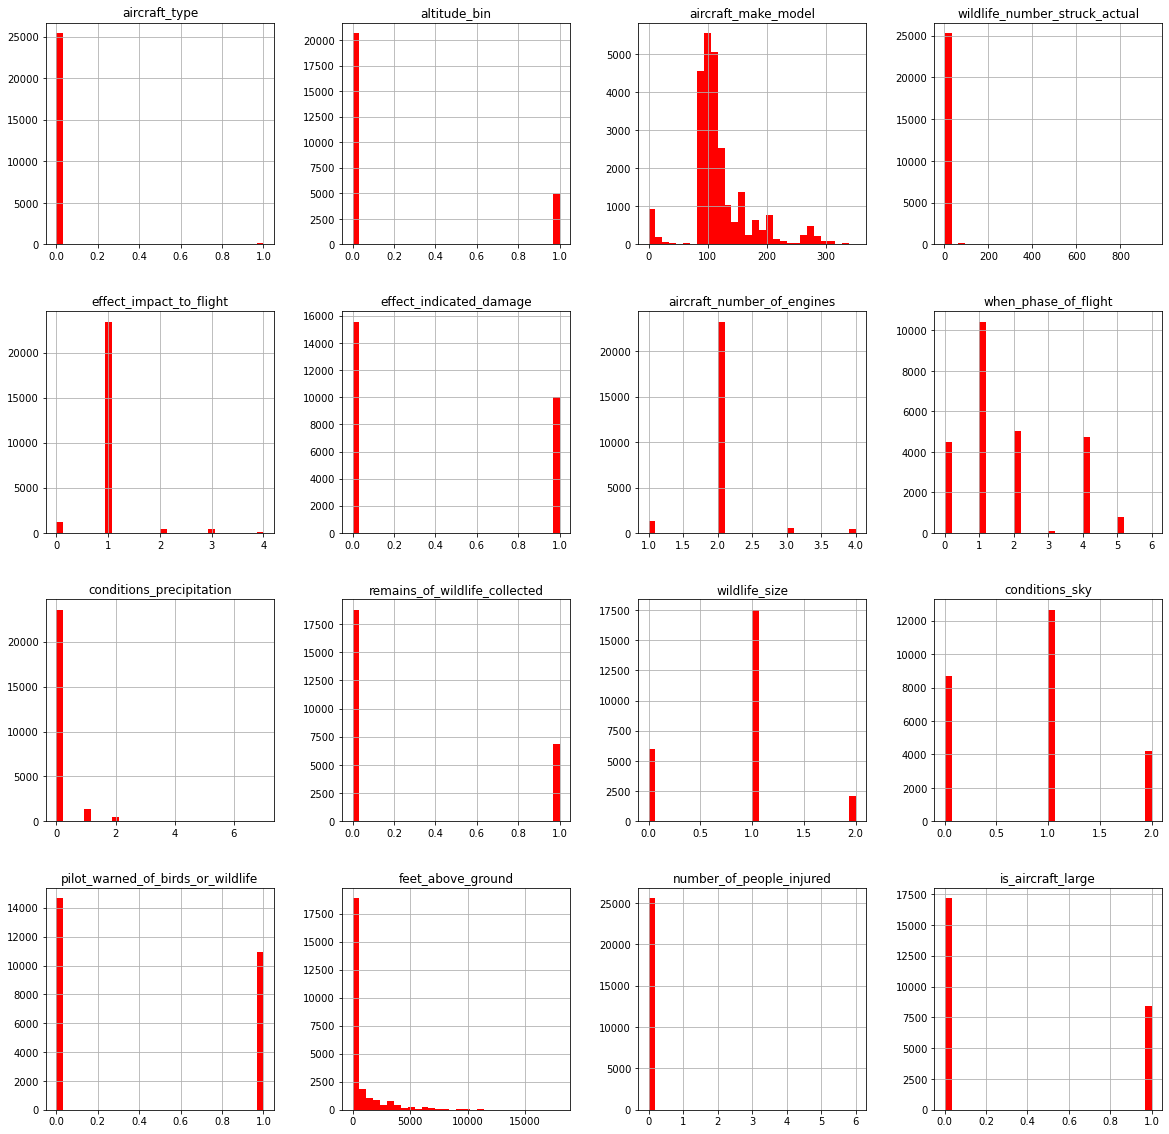

In [13]:
ds_bst.hist(bins = 30, figsize = (20, 20), color = 'r')

Now, histograms corresponding to features aircraft_type and number_of_people_injured reflect strong repetition. Said features will be dropped to avoid further overfitting or similar issues.  
NOTE: Other features also show repetition but could be useful, might be worth keeping an eye on these.

In [14]:
ds_bst.drop(['aircraft_type', 'number_of_people_injured'], inplace = True, axis = 1)

Now that the dataset has been cleaned, a new file containing said modified values can be written/created.

In [15]:
ds_bst.to_csv('bird_strikes_clean.csv', index = False)

## 3. Most influentuial feature analysis 

It's convenient to determine the feature that'll be predicted.  
For this particular dataset, *effect_indicated_damage* will be the output to predict, with 0 being _non-fatal_ and 1 being _fatal_.

In [16]:
non_fatal = ds_bst[ds_bst['effect_indicated_damage'] == 0]
fatal = ds_bst[ds_bst['effect_indicated_damage'] == 1]

In [17]:
print(f'Total = {len(ds_bst)}')

print(f'\nNon fatal cases = {len(non_fatal)}')
print(f'Percentage = {len(non_fatal)/len(ds_bst)}%')

print(f'\nFatal cases = {len(fatal)}')
print(f'Percentage = {len(fatal)/len(ds_bst)}%')

Total = 25558

Non fatal cases = 15573
Percentage = 0.6093199780890524%

Fatal cases = 9985
Percentage = 0.39068002191094764%


In [18]:
non_fatal.describe()

,altitude_bin,aircraft_make_model,wildlife_number_struck_actual,effect_impact_to_flight,effect_indicated_damage,aircraft_number_of_engines,when_phase_of_flight,conditions_precipitation,remains_of_wildlife_collected,wildlife_size,conditions_sky,pilot_warned_of_birds_or_wildlife,feet_above_ground,is_aircraft_large
count,15573.000000,15573.000000,15573.000000,15573.000000,15573.0,15573.000000,15573.000000,15573.000000,15573.000000,15573.000000,15573.000000,15573.000000,15573.000000,15573.000000
mean,0.183651,120.054903,2.548899,1.009311,0.0,2.008348,1.725165,0.113145,0.257112,0.832916,0.815707,0.428691,761.634431,0.342387
std,0.387212,51.968012,12.594574,0.290889,0.0,0.353228,1.414389,0.455483,0.437056,0.489109,0.687261,0.494905,1687.968016,0.474524
min,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,96.000000,1.000000,1.000000,0.0,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,109.000000,1.000000,1.000000,0.0,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,45.000000,0.000000
75%,0.000000,132.000000,1.000000,1.000000,0.0,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,500.000000,1.000000
max,1.000000,350.000000,942.000000,4.000000,0.0,4.000000,6.000000,7.000000,1.000000,2.000000,2.000000,1.000000,18000.000000,1.000000


In [19]:
fatal.describe()

,altitude_bin,aircraft_make_model,wildlife_number_struck_actual,effect_impact_to_flight,effect_indicated_damage,aircraft_number_of_engines,when_phase_of_flight,conditions_precipitation,remains_of_wildlife_collected,wildlife_size,conditions_sky,pilot_warned_of_birds_or_wildlife,feet_above_ground,is_aircraft_large
count,9985.000000,9985.000000,9985.000000,9985.000000,9985.0,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000
mean,0.203505,119.555533,2.913971,1.022534,1.0,1.989685,1.684326,0.122584,0.282624,0.872108,0.837156,0.423736,854.504156,0.307461
std,0.402625,54.964522,13.096448,0.520217,0.0,0.385528,1.460518,0.478709,0.450298,0.611692,0.691003,0.494174,1807.838748,0.461465
min,0.000000,0.000000,1.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,95.000000,1.000000,1.000000,1.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,109.000000,1.000000,1.000000,1.0,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,50.000000,0.000000
75%,0.000000,132.000000,1.000000,1.000000,1.0,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,800.000000,1.000000
max,1.000000,347.000000,859.000000,4.000000,1.0,4.000000,6.000000,7.000000,1.000000,2.000000,2.000000,1.000000,17000.000000,1.000000


<AxesSubplot:>

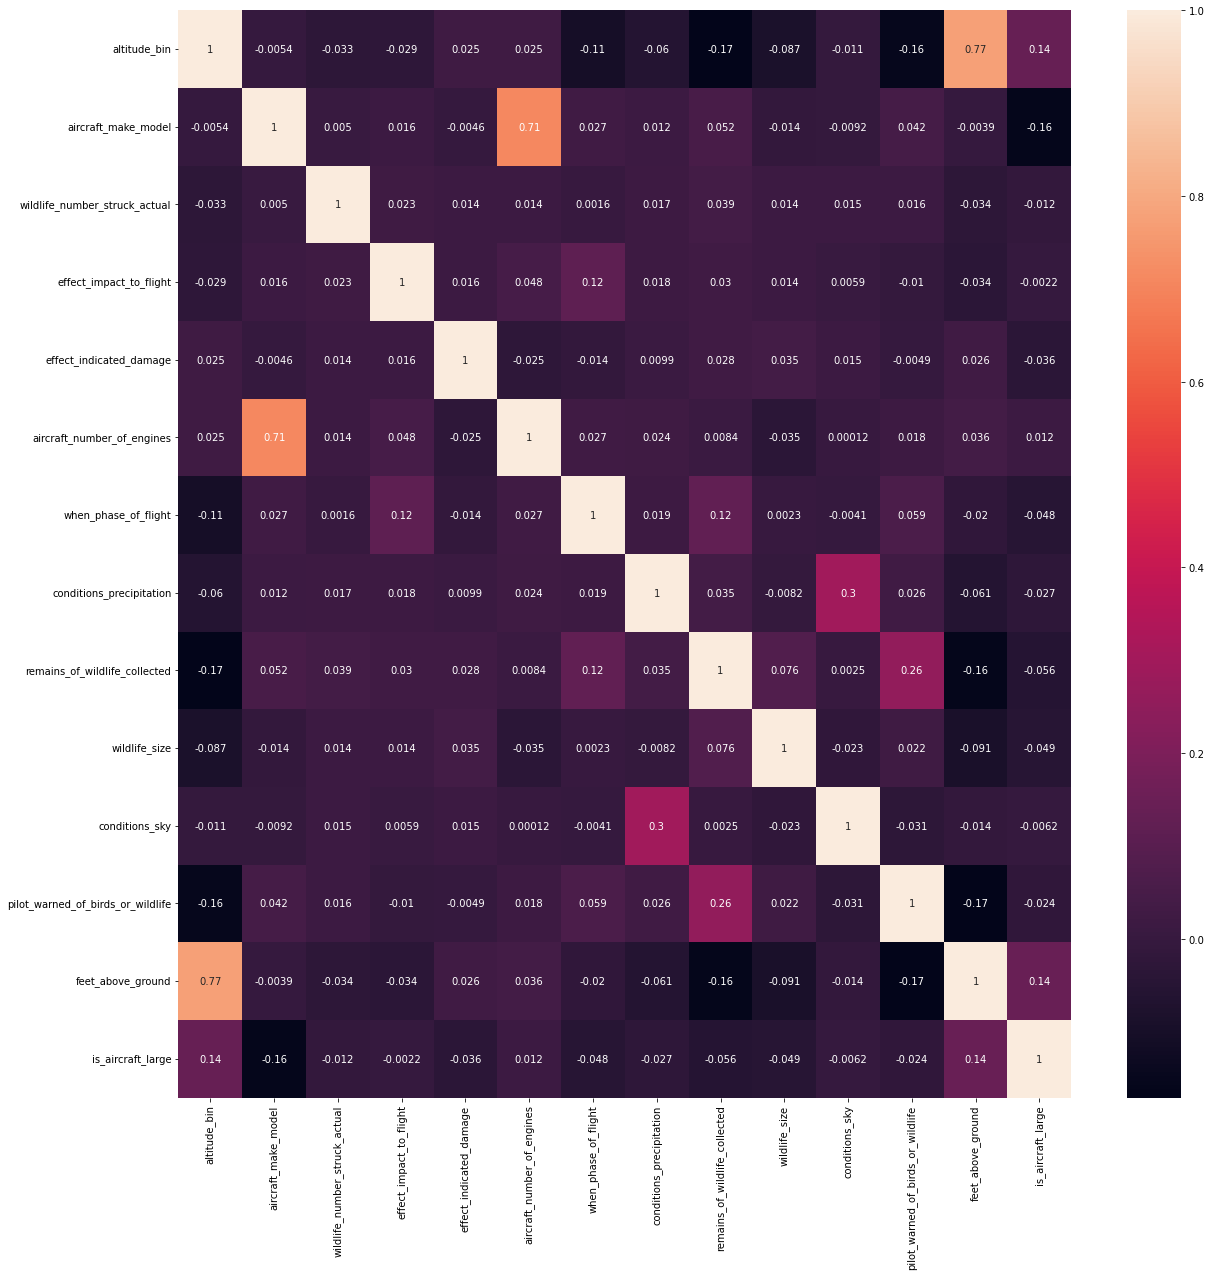

In [20]:
# Correlation analysis
correlations = ds_bst.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

<AxesSubplot:xlabel='aircraft_number_of_engines', ylabel='count'>

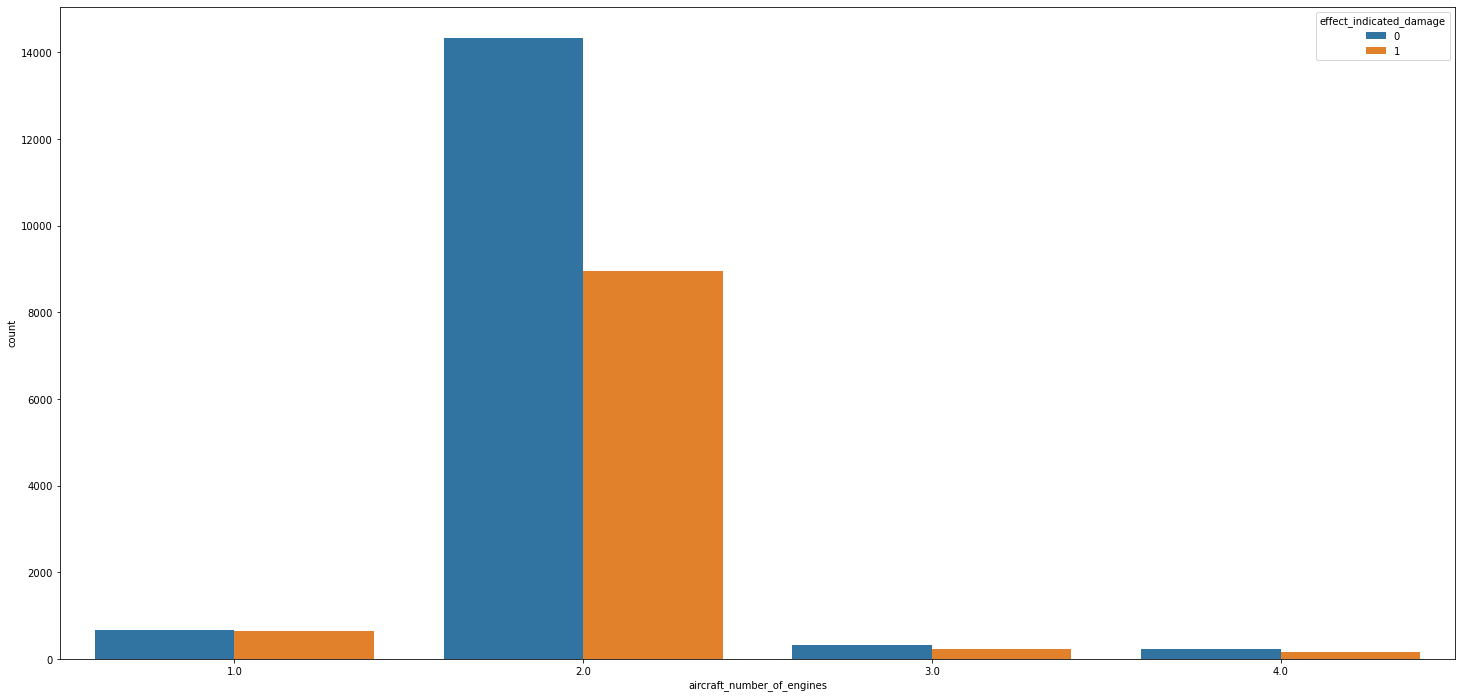

In [21]:
# Relevant histogram given correlation analysis
plt.figure(figsize = (25, 12))
sns.countplot(x = 'aircraft_number_of_engines', hue = 'effect_indicated_damage', data = ds_bst)

Text(0.5, 0, 'Number of engines')

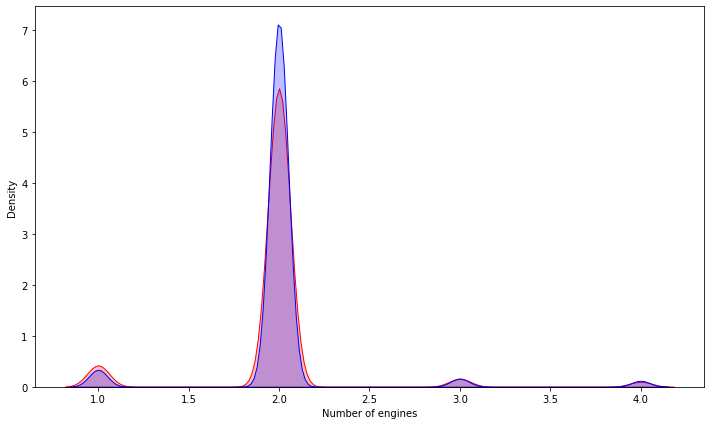

In [22]:
plt.figure(figsize = (12, 7))
sns.kdeplot(fatal['aircraft_number_of_engines'], shade = True, color = 'r')
sns.kdeplot(non_fatal['aircraft_number_of_engines'], shade = True, color = 'b')

plt.xlabel('Number of engines')

This concludes the cleaning and visualization of the dataset choosen.  
Further development and next stages are described in related document.